Citizen weather observer program weather data
---

The temperature data shows a good correlation with the shrinking circle area. But they aren't high resolution enough.

Use the Citizen weather observer program (or other sources of temperature data) with a higher spatial resolution.

In [32]:
from bs4 import BeautifulSoup
import requests
import os
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
import geopandas as gpd

cwop_weather_data_path = '../weather-data/cwop/'
live_view_data_path = '../weather-data/tesseract/live_view_inted.csv'
image_df_path = '../photos/live_image_df.csv'

# get live view data to compare to

In [33]:
def printline(length = 79, character = '-'):
    print(character * length)

printline()
live_data = pd.read_csv(live_view_data_path, index_col=None)
live_data.info()

printline()
image_df = pd.read_csv(image_df_path, index_col = None)
image_df['date']= pd.to_datetime(image_df['date'])
cols_i_care_about = ['date']

image_df = image_df[cols_i_care_about]
image_df.info()
printline()

-------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227 entries, 0 to 1226
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   temp    1227 non-null   int64
dtypes: int64(1)
memory usage: 9.7 KB
-------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227 entries, 0 to 1226
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1227 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 9.7 KB
-------------------------------------------------------------------------------


In [37]:
#merge the two so the temperatures have datetimes

#tdf temperature dataframe
tdf = live_data.join(image_df)
#convert date string to datetime
tdf.set_index('date', inplace=True)
#convert to centrigroid
tdf['tempc'] = (tdf['temp']-32)*5/9

tdf.info()
tdf.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1227 entries, 2024-09-17 19:30:00 to 2024-09-29 12:30:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    1227 non-null   int64  
 1   tempc   1227 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 28.8 KB


,temp,tempc
date,,
2024-09-17 19:30:00,69,20.555556
2024-09-17 19:45:00,69,20.555556
2024-09-17 20:00:00,68,20.000000
2024-09-17 20:15:00,68,20.000000
2024-09-17 20:30:00,66,18.888889


<Axes: title={'center': 'live feed image-derived temperature'}, xlabel='date', ylabel='temperature oF'>

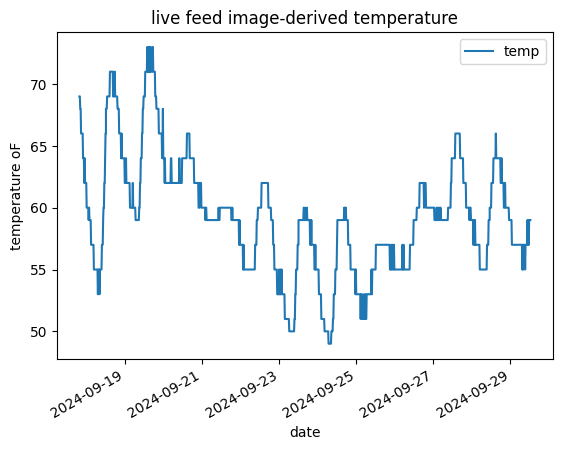

In [36]:
tdf.plot(title='live feed image-derived temperature', ylabel='temperature oF', xlabel='date')

In [103]:
# get CWOP station data for massachcuchsetch

cwop_ma_stations = 'http://www.wxqa.com/states/MA.html'
result = requests.get(cwop_ma_stations)

bs = BeautifulSoup(result.content, 'html.parser')
table = bs.find("table")

table_headers = [header.text.strip() for header in table.find_all("th")]
table_headers

table_rows = [
    [ element.text.strip() for element in row.find_all('td') ]
    for row in table.find_all("tr")
]

#make dataframe from table
cwop_stations = pd.DataFrame(table_rows[2:], columns = table_headers)

#extract numbers
cwop_stations['lat'] = cwop_stations['Lat/Lon/Maps'].apply(lambda latlon: float(latlon.split('/')[0]))
cwop_stations['lon'] = cwop_stations['Lat/Lon/Maps'].apply(lambda latlon: float(latlon.split('/')[1]))

cwop_stations


,Call/CW,Town/City/Meta,Lat/Lon/Maps,Elev (m),Weather Graphs,Near Stns,NOAA MesoMap,CWOP QC,Meso West,email to:,Web Sites,lat,lon
0,N1UEC,Walpole,42.10833 / -71.285,78.73,WxGraph,Stns,N1UEC,AP033,AP033,Lou,,42.10833,-71.28500
1,N1LTP,Norton,41.99267 / -71.16667,30.26,WxGraph,Stns,N1LTP,AP535,AP535,Ed,N1LTP,41.99267,-71.16667
2,N1OTX,Woburn,42.458 / -71.1955,47.34,WxGraph,Stns,N1OTX,AP564,AP564,Paul,N1OTX,42.45800,-71.19550
3,WX1PBD,Peabody,42.53883 / 70.98017,50,WxGraph,Stns,WX1PBD,AR100,AR100,Jeff,,42.53883,70.98017
4,N1IER,Berkley,41.8475 / -71.05333,22,WxGraph,Stns,N1IER,AR510,AR510,Ken,N1IER,41.84750,-71.05333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,GW4710,SOUTH HAMILTON,42.61500 / -70.89000,18,WxGraph,Stns,GW4710,G4710,G4710,CARLO,,42.61500,-70.89000
250,GW4827,WELLESLEY,42.29500 / -71.30250,50,WxGraph,Stns,GW4827,G4827,G4827,WHITIN,GW4827,42.29500,-71.30250
251,GW5153,CHARLTON,42.13750 / -71.96550,888,WxGraph,Stns,GW5153,G5153,G5153,MICHAEL,,42.13750,-71.96550
252,GW5304,IPSWICH,42.68617 / -70.84583,13,WxGraph,Stns,GW5304,G5304,G5304,JOHN,,42.68617,-70.84583


In [ ]:
#take a look what where the stationses

In [144]:
#clicking a Town/City/Meta station name takes one to a page that has CSV files available

day_options = [7,14,28,56]

csv_address = r'https://weather.gladstonefamily.net/cgi-bin/wxobservations.pl?site={station}&days={days}'


In [155]:
cwop_stations['url-code'] = cwop_stations['Call/CW'].apply(lambda code: code[:1] + code[2:])

cwop_data = [
    requests.get(
        csv_address.format(station = str(station), days = 14)
    )
    for station in cwop_stations['url-code'][:5]
]

In [156]:
#all these responses don't have the right headers.
#and don't include the actual data.

sample_data = cwop_data[0]
sample_data.status_code

200

In [321]:
#just generate all the urls and save the csvs on my own

station_urls = [
    csv_address.format(station = station, days = 14)
    for station in cwop_stations['Call/CW']
]

station_urls[:5]

#this doesn't work either. Oh well.

#pick a spot just west of the quabbin as the center location
guess_latlon = [42.5, -72.4]

#this site finds nearby stations:
#http://www.findu.com/cgi-bin/wxnear.cgi?lat=42.5&lon=-72.4

#I'm just copying these codes into
#the csv_address in my browser to get the csvs and save directly
#for some reason it involves dropping the second letter of the code.

#http://www.findu.com/cgi-bin/wxpage.cgi?call=KB1GNF this doesn't work.

#save location
findu_save_location = '../weather-data/cwop/'
findu_files = os.listdir(findu_save_location)

#save files manually downloaded
raw_cwop_data = {
    file.replace('.csv',''):pd.read_csv(findu_save_location + file)
    for file in findu_files
}

#each value is a pandas dataframe. add a station column to each.
cwop_data = {}
for key, value in raw_cwop_data.items():
    this_dataframe = raw_cwop_data[key].copy()
    this_dataframe['station'] = key
    cwop_data.update({
        key:this_dataframe
    })

#join the datas
cwop_data = pd.concat(cwop_data.values())

#change to datetime
cwop_data['date'] = pd.to_datetime(cwop_data['Time (UTC)'])

cwop_data.info()
cwop_data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 25317 entries, 0 to 1800
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Time (UTC)                           25317 non-null  object        
 1   Barometric Pressure (mbar)           25317 non-null  float64       
 2   Temperature (degrees F)              25317 non-null  float64       
 3   Dewpoint (degrees F)                 25317 non-null  float64       
 4   Relative Humidity (%)                25317 non-null  int64         
 5   Wind speed (mph)                     22055 non-null  float64       
 6   Wind direction (degrees)             16540 non-null  float64       
 7   Analysis Barometric Pressure (mbar)  8976 non-null   float64       
 8   Analysis Temperature (degrees F)     8976 non-null   float64       
 9   Analysis Dewpoint (degrees F)        8976 non-null   float64       
 10  Analysis Relativ

,Time (UTC),Barometric Pressure (mbar),Temperature (degrees F),Dewpoint (degrees F),Relative Humidity (%),Wind speed (mph),Wind direction (degrees),Analysis Barometric Pressure (mbar),Analysis Temperature (degrees F),Analysis Dewpoint (degrees F),Analysis Relative Humidity (%),Analysis Wind speed (mph),Analysis Wind direction (degrees),station,date
0,2024-09-16 01:43:00,1026.6,65.0,59.8,83,0.0,0.0,1028.15,61.8,55.6,80.0,NaN,214.0,CW4957,2024-09-16 01:43:00
1,2024-09-16 01:48:00,1026.6,65.0,60.1,84,0.0,0.0,1028.23,61.8,55.6,80.0,NaN,209.0,CW4957,2024-09-16 01:48:00
2,2024-09-16 01:53:00,1026.6,65.0,60.1,84,0.0,0.0,1028.23,61.8,55.6,80.0,NaN,218.0,CW4957,2024-09-16 01:53:00
3,2024-09-16 01:58:00,1026.8,65.0,60.1,84,0.0,0.0,1028.23,61.8,55.6,80.0,NaN,218.0,CW4957,2024-09-16 01:58:00
4,2024-09-16 02:13:00,1027.0,64.0,59.4,84,0.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,CW4957,2024-09-16 02:13:00


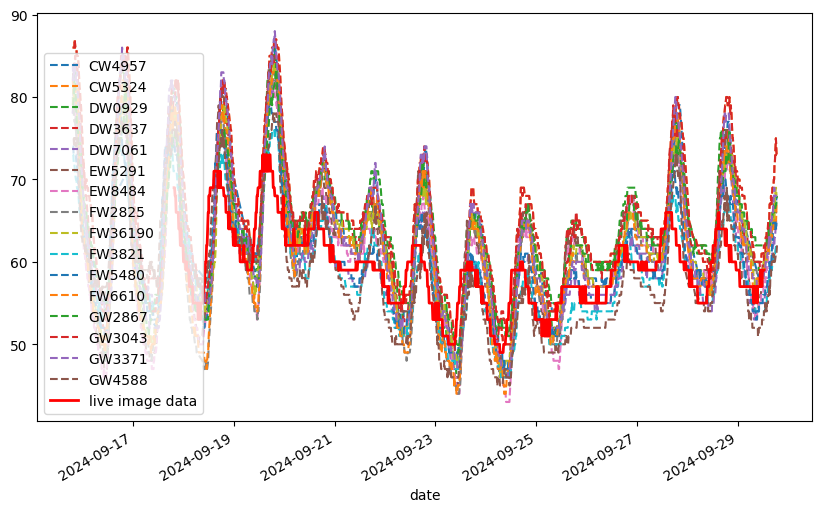

In [322]:
#plot the temperatures

fig, ax = plt.subplots(figsize=(10,6))

for station in cwop_data['station'].unique():
    this_station_data = cwop_data.loc[cwop_data['station'] == station]
    # data_noindex.loc[data_noindex['station'] == station].plot(x='time', y='temp')
    ax.plot(this_station_data['date'], this_station_data['Temperature (degrees F)'], label=station, linestyle='--')

tdf.reset_index().plot(x='date', y='temp', label = 'live image data', ax=ax, color = 'red', linestyle='-', linewidth = 2)

plt.legend()
plt.show()

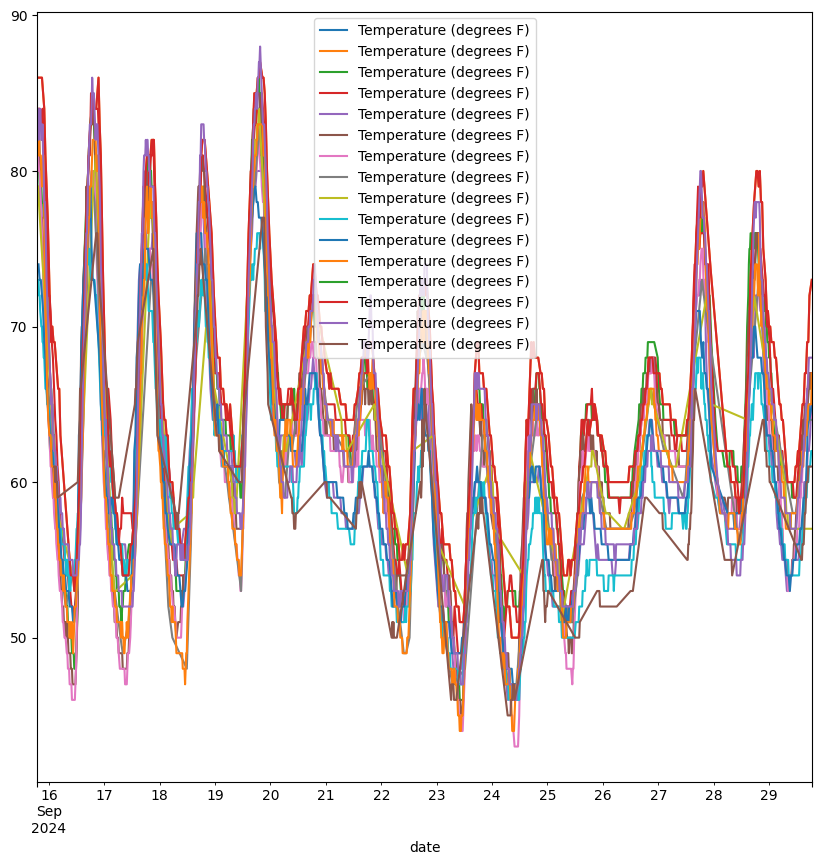

In [323]:
#make a list of unique stations
stations = cwop_data['station'].unique()

station_intertemps = {}

for station in stations:
    station_mask = cwop_data['station'] == station
    this_data = cwop_data.loc[station_mask, ['Temperature (degrees F)','date']]
    this_data_series = this_data.set_index('date')
    this_15min_data = this_data_series.resample('15min').interpolate()
    station_intertemps.update({station:this_15min_data})

#perform a cross-correlation with the temperature data and these series
fig, ax = plt.subplots(figsize=(10,10))
for thing in station_intertemps:
    station_intertemps[thing].plot(ax = ax)

In [324]:
#put all the temperatures in one dataframe
tempdf = pd.DataFrame([intertemp['Temperature (degrees F)'].rename(f"{key}") for key, intertemp in station_intertemps.items()]).T

In [326]:
#look at correlations between temperature from live view images
#with 15 minute sampled temperatures from cwop
temp_corrs = tdf.corr()['tempc'].sort_values()
temp_corrs

FW2825     0.693685
GW3371     0.705441
CW5324     0.712256
GW3043     0.712256
FW6610     0.729768
FW36190    0.736498
DW0929     0.740392
DW3637     0.750690
EW8484     0.760808
EW5291     0.786637
GW4588     0.823610
DW7061     0.836718
FW3821     0.839690
F5480      0.852280
temp       1.000000
tempc      1.000000
CW4957          NaN
GW2867          NaN
Name: tempc, dtype: float64

In [327]:
station_corrs = pd.concat([
    cwop_stations.set_index('Call/CW'),
    pd.DataFrame(temp_corrs).rename_axis('Call/CW')
])

# station_corrs = station_corrs.dropna(subset='tempc')
# station_corrs.sort_values(by = 'tempc')[:-2]

station_corrs = station_corrs.join(cwop_stations, lsuffix='_as')
station_corrs

,Town/City/Meta_as,Lat/Lon/Maps_as,Elev (m)_as,Weather Graphs_as,Near Stns_as,NOAA MesoMap_as,CWOP QC_as,Meso West_as,email to:_as,Web Sites_as,...,Weather Graphs,Near Stns,NOAA MesoMap,CWOP QC,Meso West,email to:,Web Sites,lat,lon,url-code
Call/CW,,,,,,,,,,,,,,,,,,,,,
N1UEC,Walpole,42.10833 / -71.285,78.73,WxGraph,Stns,N1UEC,AP033,AP033,Lou,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N1LTP,Norton,41.99267 / -71.16667,30.26,WxGraph,Stns,N1LTP,AP535,AP535,Ed,N1LTP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N1OTX,Woburn,42.458 / -71.1955,47.34,WxGraph,Stns,N1OTX,AP564,AP564,Paul,N1OTX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WX1PBD,Peabody,42.53883 / 70.98017,50,WxGraph,Stns,WX1PBD,AR100,AR100,Jeff,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N1IER,Berkley,41.8475 / -71.05333,22,WxGraph,Stns,N1IER,AR510,AR510,Ken,N1IER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F5480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tempc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [328]:
station_corrs

,Town/City/Meta_as,Lat/Lon/Maps_as,Elev (m)_as,Weather Graphs_as,Near Stns_as,NOAA MesoMap_as,CWOP QC_as,Meso West_as,email to:_as,Web Sites_as,...,Weather Graphs,Near Stns,NOAA MesoMap,CWOP QC,Meso West,email to:,Web Sites,lat,lon,url-code
Call/CW,,,,,,,,,,,,,,,,,,,,,
N1UEC,Walpole,42.10833 / -71.285,78.73,WxGraph,Stns,N1UEC,AP033,AP033,Lou,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N1LTP,Norton,41.99267 / -71.16667,30.26,WxGraph,Stns,N1LTP,AP535,AP535,Ed,N1LTP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N1OTX,Woburn,42.458 / -71.1955,47.34,WxGraph,Stns,N1OTX,AP564,AP564,Paul,N1OTX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WX1PBD,Peabody,42.53883 / 70.98017,50,WxGraph,Stns,WX1PBD,AR100,AR100,Jeff,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N1IER,Berkley,41.8475 / -71.05333,22,WxGraph,Stns,N1IER,AR510,AR510,Ken,N1IER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F5480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tempc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [329]:
temp_corrs

FW2825     0.693685
GW3371     0.705441
CW5324     0.712256
GW3043     0.712256
FW6610     0.729768
FW36190    0.736498
DW0929     0.740392
DW3637     0.750690
EW8484     0.760808
EW5291     0.786637
GW4588     0.823610
DW7061     0.836718
FW3821     0.839690
F5480      0.852280
temp       1.000000
tempc      1.000000
CW4957          NaN
GW2867          NaN
Name: tempc, dtype: float64

In [330]:
#extract just the stations with correlations from cwop
nearby_stations = cwop_stations[cwop_stations['Call/CW'].apply(lambda station: station in temp_corrs.index)]
nearby_stations = nearby_stations[['Call/CW','lat','lon']]

nearby_stations = nearby_stations.set_index('Call/CW').join(temp_corrs)
nearby_stations.sort_values(by = 'tempc', ascending = False)

,lat,lon,tempc
Call/CW,,,
FW3821,42.50050,-72.76800,0.839690
DW7061,42.43750,-72.43200,0.836718
EW5291,42.25183,-72.38567,0.786637
EW8484,42.22367,-72.37450,0.760808
DW3637,42.14633,-72.57867,0.750690
DW0929,42.08000,-72.48450,0.740392
FW6610,42.31617,-72.66483,0.729768
CW5324,42.40000,-72.50000,0.712256
GW3043,42.53233,-72.54767,0.712256


In [331]:
#save these nearby correlations
nearby_stations.to_csv('../nearby_station_correlations.csv')